In [11]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

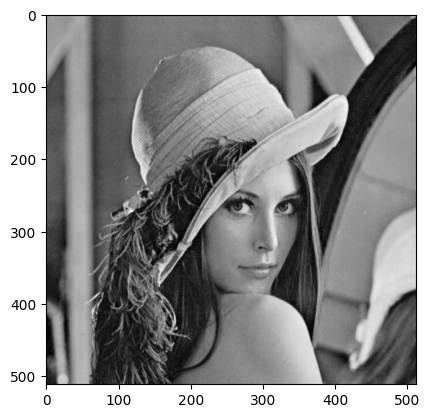

In [12]:
img = cv2.imread('images/lena.bmp', cv2.IMREAD_GRAYSCALE)
img = np.array(img, dtype=np.float64)
plt.imshow(img, cmap='gray')

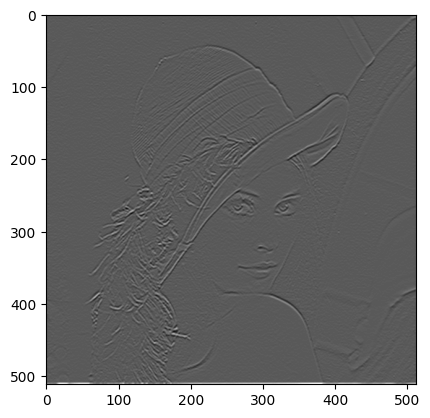

In [13]:
# Apply a kernel using our own convolutional function
def convolution(img, kernel):
    img_h, img_w = img.shape
    kernel_h, kernel_w = kernel.shape
    pad_h = kernel_h // 2
    pad_w = kernel_w // 2
    out = np.zeros((img_h, img_w), dtype=np.float64)
    img_pad = np.zeros((img_h + 2 * pad_h, img_w + 2 * pad_w), dtype=np.float64)
    img_pad[pad_h:img_h + pad_h, pad_w:img_w + pad_w] = img
    for y in range(img_h):
        for x in range(img_w):
            out[y, x] = (kernel * img_pad[y:y + kernel_h, x:x + kernel_w]).sum()
    return np.float64(out)

# kernel = np.array([[-1, 1, -1], [-1, 1, -1], [-1, 1, -1]])
# out = convolution(img, kernel)
kernel = np.array([[-1, -1, -1], [2, 2, 2], [-1, -1, -1]], dtype=np.float64)
out = convolution(img, kernel)
kernel = np.array([[-1, 5, -1], [-1, 5, -1], [-1, 5, -1]], dtype=np.float64)
out = convolution(out, kernel)
plt.imshow(out, cmap='gray')

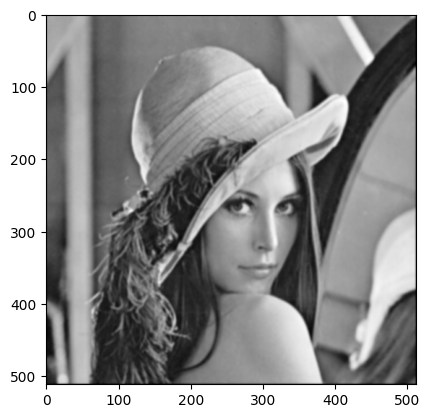

In [14]:
kernel = np.array([ [1, 2, 4, 2, 1], 
                    [2, 4, 8, 4, 2], 
                    [4, 8, 8, 8, 4], 
                    [2, 4, 8, 4, 2], 
                    [1, 2, 4, 2, 1], ], dtype=np.float64)
kernel = kernel / kernel.sum()
kernel /= kernel.sum()
out = convolution(img, kernel)
plt.imshow(out, cmap='gray')

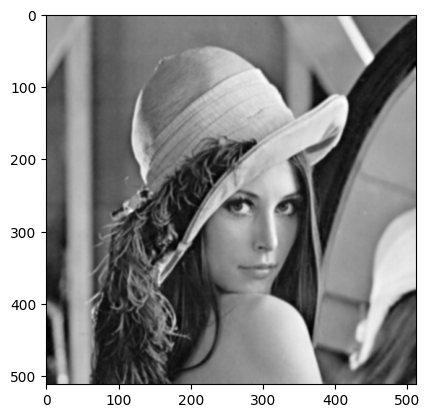

In [15]:
out = cv2.GaussianBlur(img, (5, 5), 0)
plt.imshow(out, cmap='gray')

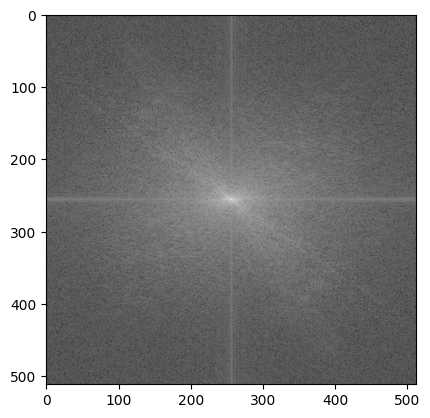

In [17]:
img_fourier = np.fft.fftshift(np.fft.fft2(img))
plt.imshow(np.log(np.abs(img_fourier)), cmap='gray')

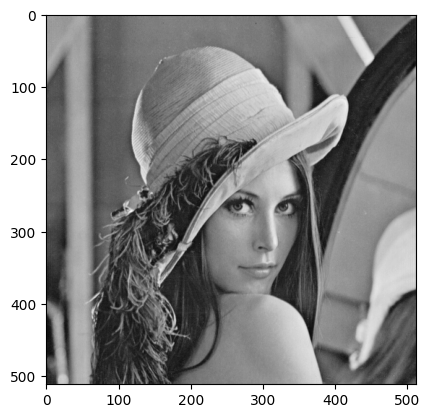

In [19]:
# recounstrict the image based on furier transform
img_fourier = np.fft.fftshift(np.fft.fft2(img))

# apply a filter
img_fourier[0:50, :] = 0
img_fourier[:, 0:50] = 0
img_fourier[-50:, :] = 0
img_fourier[:, -50:] = 0

# reconstruct the image
img_back = np.fft.ifft2(np.fft.ifftshift(img_fourier))
img_back = np.abs(img_back)
plt.imshow(img_back, cmap='gray')